# Exercise 3.9

This question involves the use of multiple linear regression on the
`Auto` data set.

## (a) Produce a scatterplot matrix which includes all of the variables in the data set.

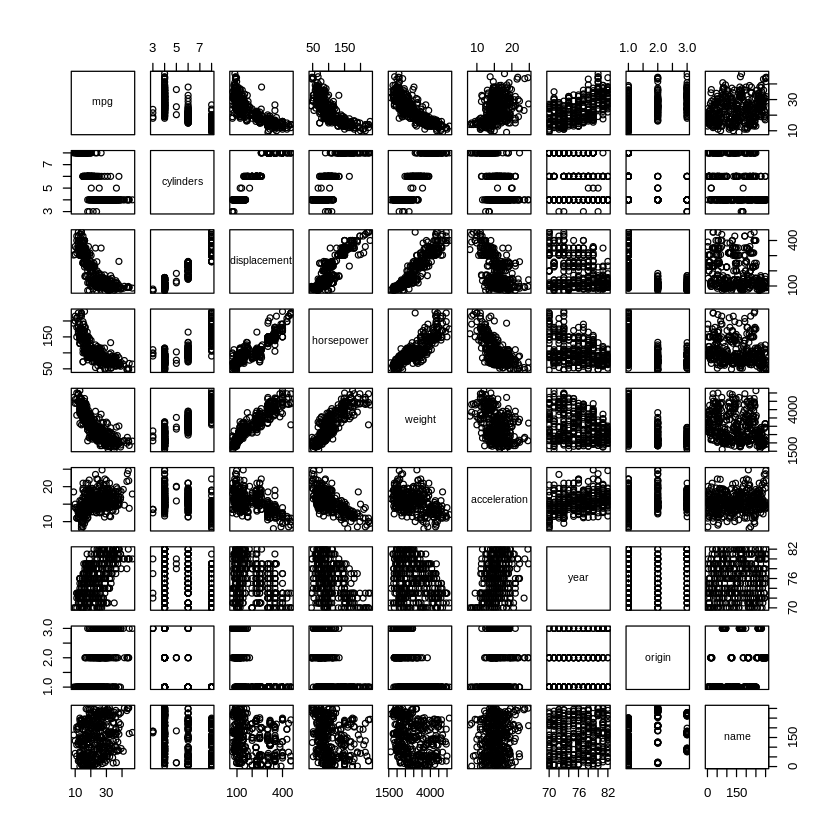

In [ ]:
pairs(Auto)

## (b) Compute the matrix of correlations between the variables using the function `cor()`. You will need to exclude the name variable, `cor()` which is qualitative.

In [ ]:
cor(Auto[-c(9)])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


## (c) Use the `lm()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summary()` function to print the results. Comment on the output. For instance:

i. Is there a relationship between the predictors and the response?

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the `year` variable suggest?

In [ ]:
lm.fit <- lm(mpg ~ . - name, data = Auto)
summary(lm.fit)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


i. Yes. The $F$-test suggests that there must be a relationship between the predictors and the response. Also, some predictors have very small $p$-values.

ii. `displacement`, `weight`, `year`, and `origin` appear to have a statistically significant relationship to the response.

iii. The positive coefficient suggests that `year` and `mpg` are positively correlated.

## (d) Use the `plot()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

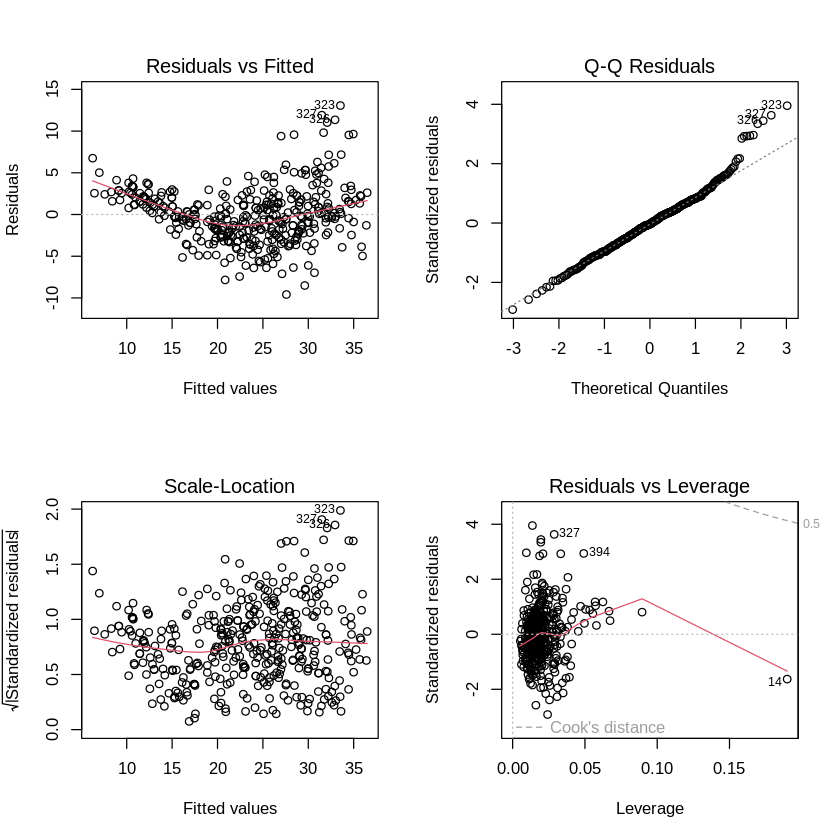

In [ ]:
par(mfrow = c(2, 2))
plot(lm.fit)

The residual plot suggests non-linearity of the data and outliers like Observation 327. The leverage plot shows that Observation 14 is a high leverage point.

## (e) Use the `*` and `:` symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [ ]:
summary(lm(mpg ~ (. - name)^2, data = Auto))


Call:
lm(formula = mpg ~ (. - name)^2, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6303 -1.4481  0.0596  1.2739 11.1386 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)   
(Intercept)                3.548e+01  5.314e+01   0.668  0.50475   
cylinders                  6.989e+00  8.248e+00   0.847  0.39738   
displacement              -4.785e-01  1.894e-01  -2.527  0.01192 * 
horsepower                 5.034e-01  3.470e-01   1.451  0.14769   
weight                     4.133e-03  1.759e-02   0.235  0.81442   
acceleration              -5.859e+00  2.174e+00  -2.696  0.00735 **
year                       6.974e-01  6.097e-01   1.144  0.25340   
origin                    -2.090e+01  7.097e+00  -2.944  0.00345 **
cylinders:displacement    -3.383e-03  6.455e-03  -0.524  0.60051   
cylinders:horsepower       1.161e-02  2.420e-02   0.480  0.63157   
cylinders:weight           3.575e-04  8.955e-04   0.399  0.69000   
cylinders:acceleration

I included interaction terms of all possible pairs. Some interactions like `acceleration:origin` appear to be statistically significant, but most of them seem to be insignificant.

## (f) Try a few different transformations of the variables, such as $\log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

In [ ]:
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

In [ ]:
lm.fit2 <- lm(mpg ~ . - name + sqrt(displacement) + log(weight), data = Auto)
summary(lm.fit2)


Call:
lm(formula = mpg ~ . - name + sqrt(displacement) + log(weight), 
    data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6623  -1.7077  -0.1318   1.6559  12.2239 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        179.386937  44.342786   4.045 6.32e-05 ***
cylinders           -0.165128   0.312786  -0.528 0.597857    
displacement         0.086266   0.026590   3.244 0.001281 ** 
horsepower          -0.035521   0.013244  -2.682 0.007636 ** 
weight               0.003483   0.002189   1.591 0.112359    
acceleration         0.010934   0.089529   0.122 0.902859    
year                 0.794048   0.045984  17.268  < 2e-16 ***
origin               0.479603   0.273914   1.751 0.080761 .  
sqrt(displacement)  -2.337352   0.826264  -2.829 0.004918 ** 
log(weight)        -26.166698   6.936620  -3.772 0.000187 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.983 on 382 degr

In [ ]:
anova(lm.fit, lm.fit2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,384,4252.213,NA,NA,NA,NA
2,382,3398.707,2,853.5058,47.96519,2.602897e-19


We can improve our model by finding new statistically significant predictors with transformations of the variables.